In [1]:
import hnn_core
from hnn_core import jones_2009_model, read_params, simulate_dipole
from hnn_core.viz import plot_dipole
import matplotlib.pyplot as plt
from copy import deepcopy

%matplotlib inline

In [2]:
#fparams = "param_files/default.param"
fparams = "param_files/TEP_from_def_Liz_2newInputs_optimized.param"
params = read_params(fparams)
print(params)
#print(len(params))

{
    "L2Basket_Gauss_A_weight": 0.0,
    "L2Basket_Gauss_mu": 2000.0,
    "L2Basket_Gauss_sigma": 3.6,
    "L2Basket_Pois_A_weight_ampa": 0.0,
    "L2Basket_Pois_A_weight_nmda": 0.0,
    "L2Basket_Pois_lamtha": 0.0,
    "L2Pyr_Gauss_A_weight": 0.0,
    "L2Pyr_Gauss_mu": 2000.0,
    "L2Pyr_Gauss_sigma": 3.6,
    "L2Pyr_Pois_A_weight_ampa": 0.0,
    "L2Pyr_Pois_A_weight_nmda": 0.0,
    "L2Pyr_Pois_lamtha": 0.0,
    "L2Pyr_ampa_e": 0.0,
    "L2Pyr_ampa_tau1": 0.5,
    "L2Pyr_ampa_tau2": 5.0,
    "L2Pyr_apical1_L": 306.0,
    "L2Pyr_apical1_diam": 4.08,
    "L2Pyr_apicaloblique_L": 340.0,
    "L2Pyr_apicaloblique_diam": 3.91,
    "L2Pyr_apicaltrunk_L": 59.5,
    "L2Pyr_apicaltrunk_diam": 4.25,
    "L2Pyr_apicaltuft_L": 238.0,
    "L2Pyr_apicaltuft_diam": 3.4,
    "L2Pyr_basal1_L": 85.0,
    "L2Pyr_basal1_diam": 4.25,
    "L2Pyr_basal2_L": 255.0,
    "L2Pyr_basal2_diam": 2.72,
    "L2Pyr_basal3_L": 255.0,
    "L2Pyr_basal3_diam": 2.72,
    "L2Pyr_dend_Ra": 200.0,
    "L2Pyr_dend_cm": 0.619

In [3]:
TMS_intensity_base = 80 # %MT for original data
# Scaling factors for a range of %MT
TMS_intensity_scalars = [mt/TMS_intensity_base for mt in [80, 100, 120]]
print(TMS_intensity_scalars)

params80 = deepcopy(params)
params100 = deepcopy(params)
params120 = deepcopy(params)
params_list = [params80, params100, params120]

for par, scalar in zip(params_list, TMS_intensity_scalars):
    for p in par.keys():
        if "gbar_ev" in p:
            par[p] *= scalar
    #print(par)

print(params_list)

[1.0, 1.25, 1.5]
[{
    "L2Basket_Gauss_A_weight": 0.0,
    "L2Basket_Gauss_mu": 2000.0,
    "L2Basket_Gauss_sigma": 3.6,
    "L2Basket_Pois_A_weight_ampa": 0.0,
    "L2Basket_Pois_A_weight_nmda": 0.0,
    "L2Basket_Pois_lamtha": 0.0,
    "L2Pyr_Gauss_A_weight": 0.0,
    "L2Pyr_Gauss_mu": 2000.0,
    "L2Pyr_Gauss_sigma": 3.6,
    "L2Pyr_Pois_A_weight_ampa": 0.0,
    "L2Pyr_Pois_A_weight_nmda": 0.0,
    "L2Pyr_Pois_lamtha": 0.0,
    "L2Pyr_ampa_e": 0.0,
    "L2Pyr_ampa_tau1": 0.5,
    "L2Pyr_ampa_tau2": 5.0,
    "L2Pyr_apical1_L": 306.0,
    "L2Pyr_apical1_diam": 4.08,
    "L2Pyr_apicaloblique_L": 340.0,
    "L2Pyr_apicaloblique_diam": 3.91,
    "L2Pyr_apicaltrunk_L": 59.5,
    "L2Pyr_apicaltrunk_diam": 4.25,
    "L2Pyr_apicaltuft_L": 238.0,
    "L2Pyr_apicaltuft_diam": 3.4,
    "L2Pyr_basal1_L": 85.0,
    "L2Pyr_basal1_diam": 4.25,
    "L2Pyr_basal2_L": 255.0,
    "L2Pyr_basal2_diam": 2.72,
    "L2Pyr_basal3_L": 255.0,
    "L2Pyr_basal3_diam": 2.72,
    "L2Pyr_dend_Ra": 200.0,
    "L2P

In [4]:
# [net80, net100, net120]
nets = [jones_2009_model(params=par, add_drives_from_params=True) for par in params_list]

In [5]:
# [dpls80, dpls100, dpls120]
dpls_list = [simulate_dipole(net, tstop=params["tstop"], n_trials=3) for net in nets]
#print(dpls_list)

Joblib will run 3 trial(s) in parallel by distributing trials over 1 jobs.
Loading custom mechanism files from c:\Users\jacob\anaconda3\Lib\site-packages\hnn_core\mod\nrnmech.dll
Building the NEURON model
[Done]
Trial 1: 0.03 ms...
Trial 1: 10.0 ms...
Trial 1: 20.0 ms...
Trial 1: 30.0 ms...
Trial 1: 40.0 ms...
Trial 1: 50.0 ms...
Trial 1: 60.0 ms...
Trial 1: 70.0 ms...
Trial 1: 80.0 ms...
Trial 1: 90.0 ms...
Trial 1: 100.0 ms...
Trial 1: 110.0 ms...
Trial 1: 120.0 ms...
Trial 1: 130.0 ms...
Trial 1: 140.0 ms...
Trial 1: 150.0 ms...
Trial 1: 160.0 ms...
Trial 1: 170.0 ms...
Trial 1: 180.0 ms...
Trial 1: 190.0 ms...
Trial 1: 200.0 ms...
Trial 1: 210.0 ms...
Trial 1: 220.0 ms...
Trial 1: 230.0 ms...
Trial 1: 240.0 ms...
Trial 1: 250.0 ms...
Trial 1: 260.0 ms...
Trial 1: 270.0 ms...
Trial 1: 280.0 ms...
Trial 1: 290.0 ms...
Building the NEURON model
[Done]
Trial 2: 0.03 ms...
Trial 2: 10.0 ms...
Trial 2: 20.0 ms...
Trial 2: 30.0 ms...
Trial 2: 40.0 ms...
Trial 2: 50.0 ms...
Trial 2: 60.0 m

In [6]:
window_len = 30 # ms
scaling_factor = 1#3000
for dpls in dpls_list:
    for dpl in dpls:
        dpl.smooth(window_len).scale(scaling_factor)

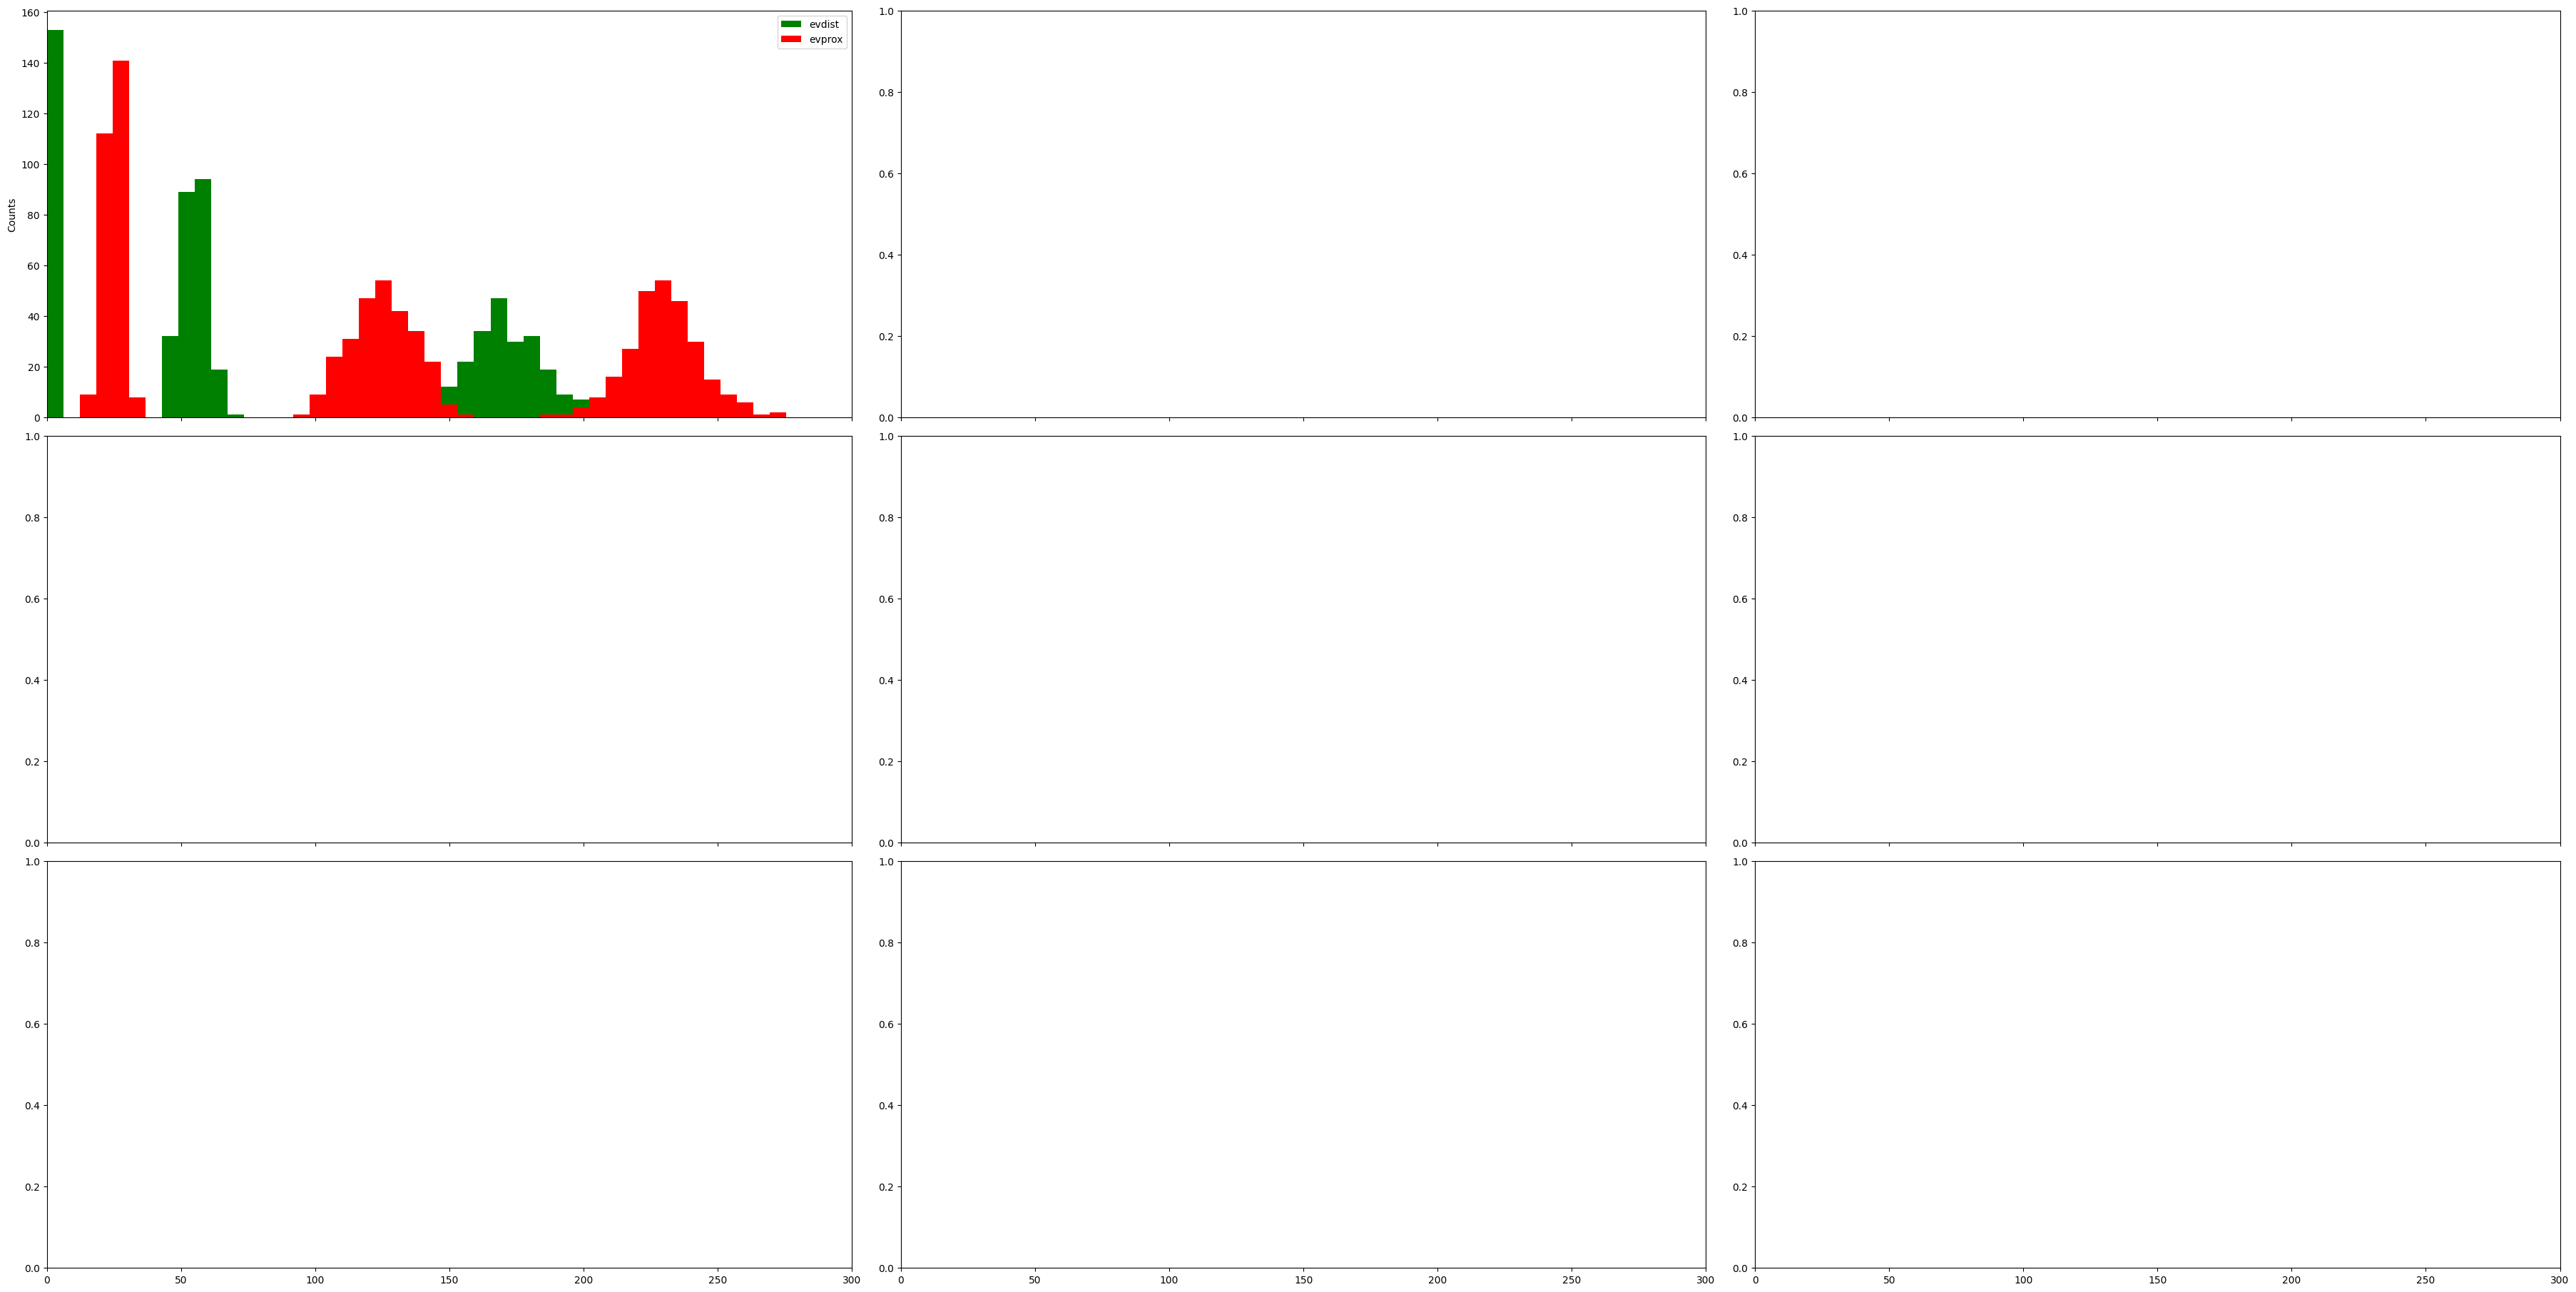

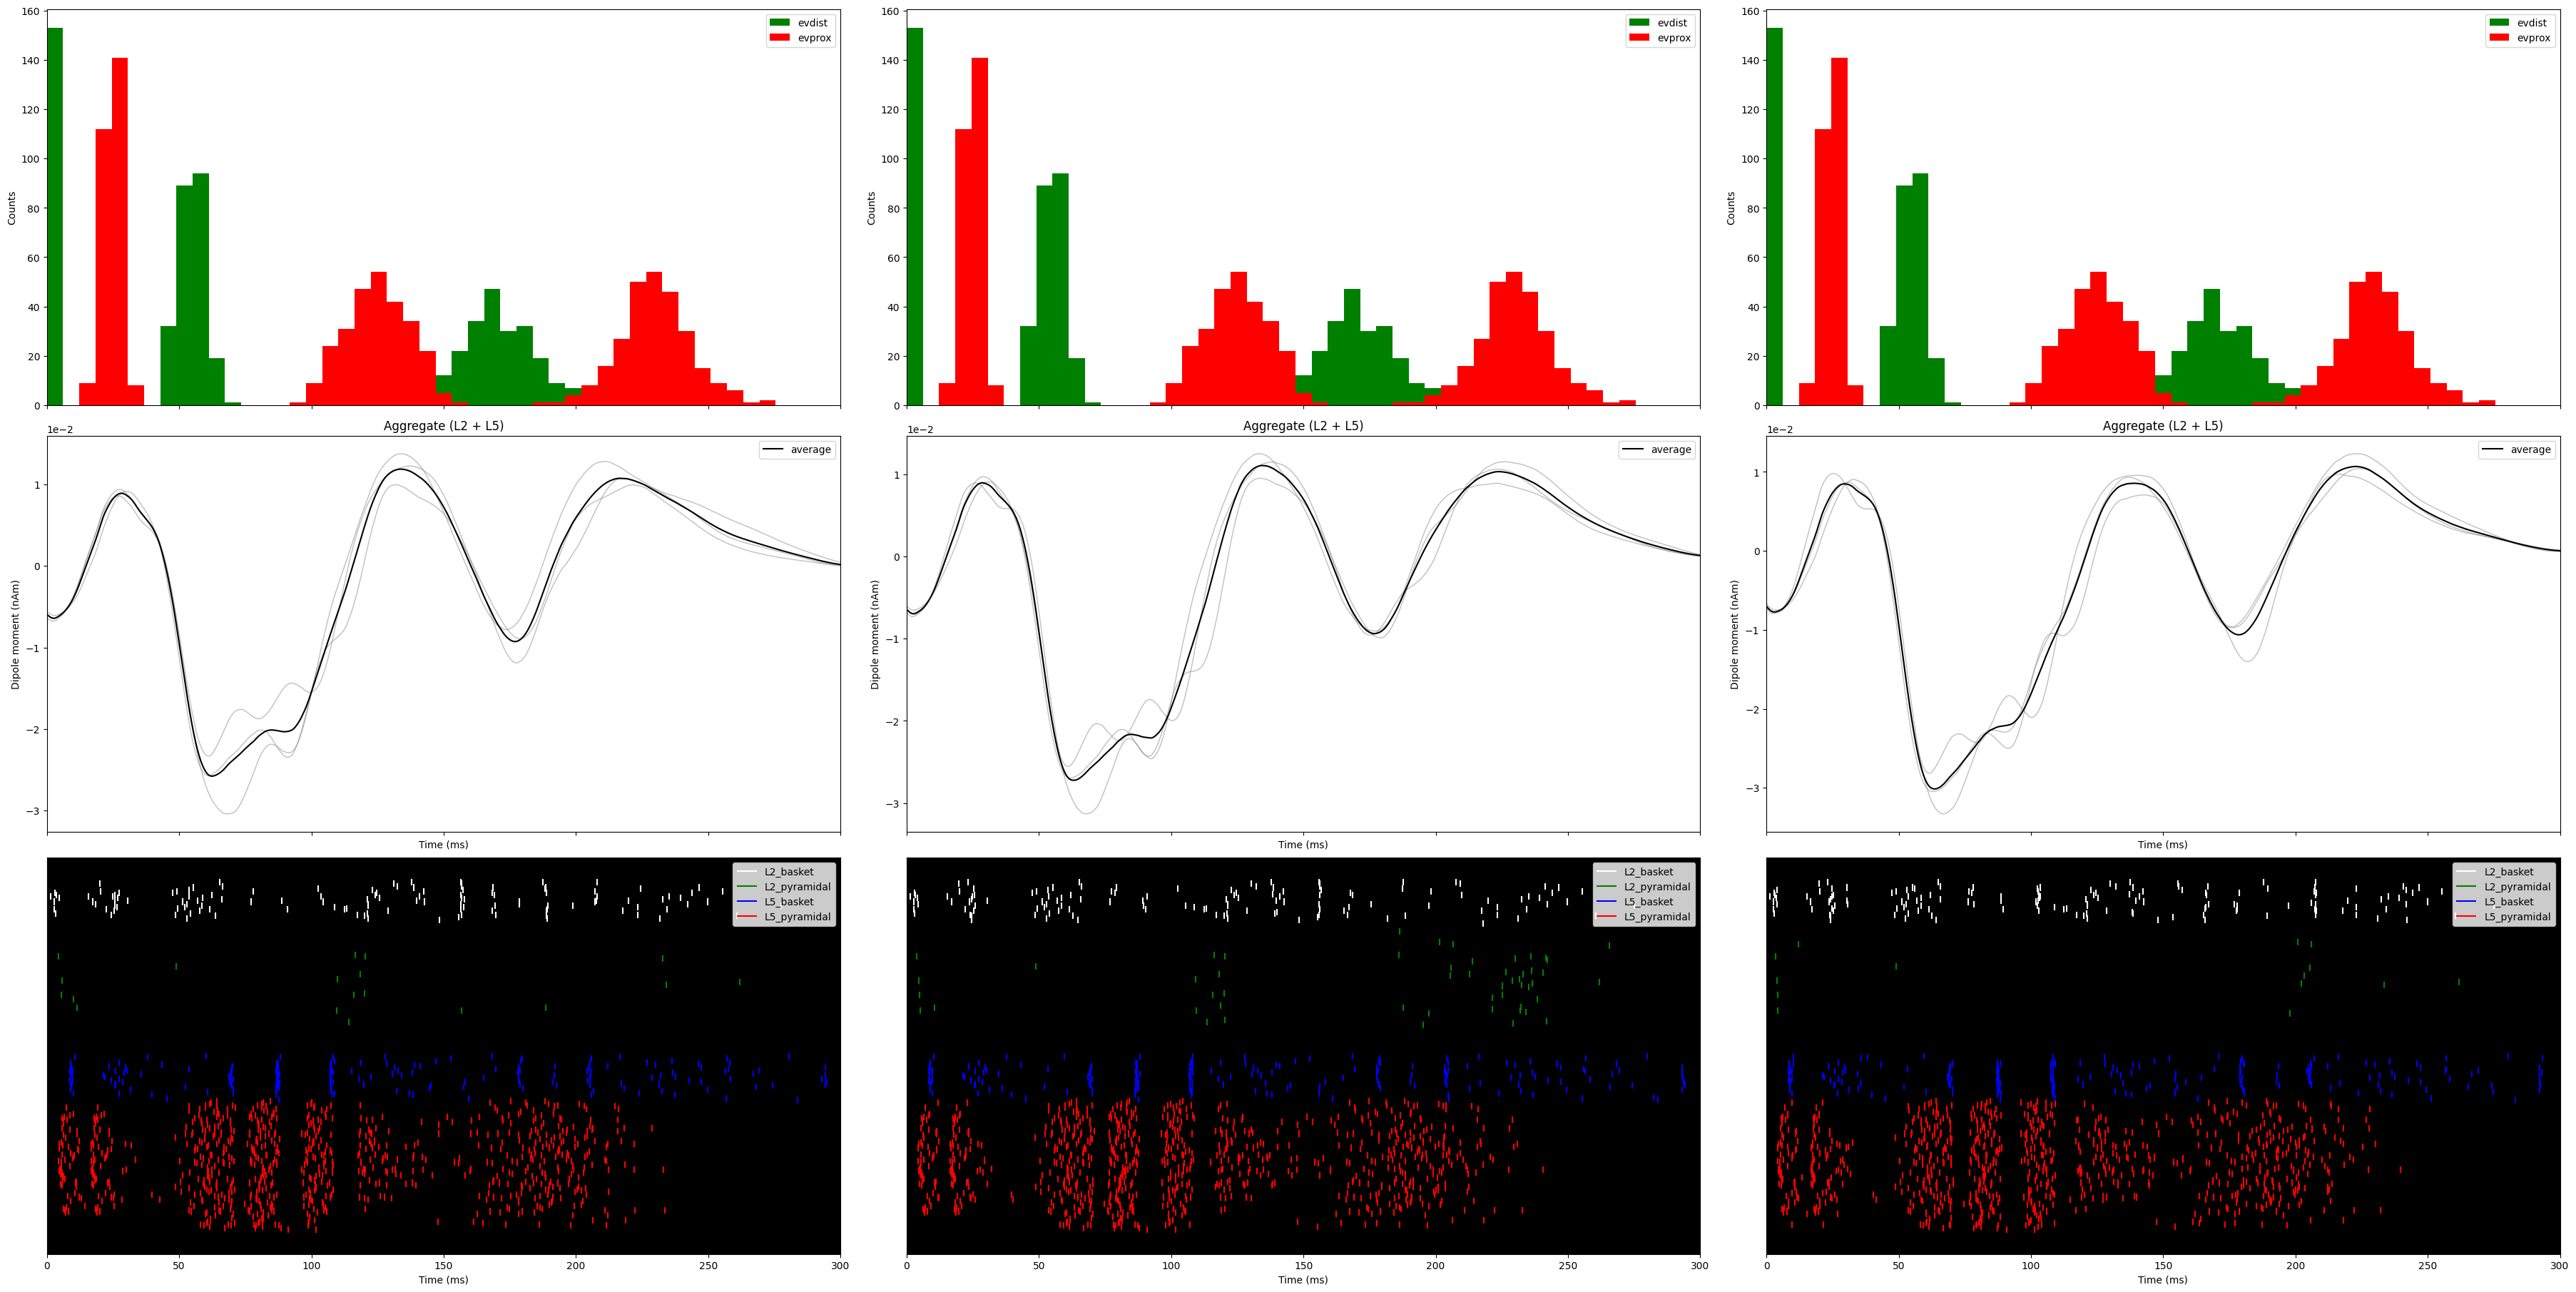

In [7]:
fig, axes = plt.subplots(3, 3, sharex=True, figsize=(36, 18), constrained_layout=True)
# for i in range(len(nets)):
nets[0].cell_response.plot_spikes_hist(ax=axes[0][0], spike_types=['evprox', 'evdist'], trial_idx=0)
plot_dipole(dpls_list[0], ax=axes[1][0], layer='agg', show=False, average=True)
nets[0].cell_response.plot_spikes_raster(ax=axes[2][0], trial_idx=0)
nets[1].cell_response.plot_spikes_hist(ax=axes[0][1], spike_types=['evprox', 'evdist'], trial_idx=0)
plot_dipole(dpls_list[1], ax=axes[1][1], layer='agg', show=False, average=True)
nets[1].cell_response.plot_spikes_raster(ax=axes[2][1], trial_idx=0)
nets[2].cell_response.plot_spikes_hist(ax=axes[0][2], spike_types=['evprox', 'evdist'], trial_idx=0)
plot_dipole(dpls_list[2], ax=axes[1][2], layer='agg', show=False, average=True)
nets[2].cell_response.plot_spikes_raster(ax=axes[2][2], trial_idx=0)


Text(0, 0.5, 'Dipole Moment (nAm * 1e-2)')

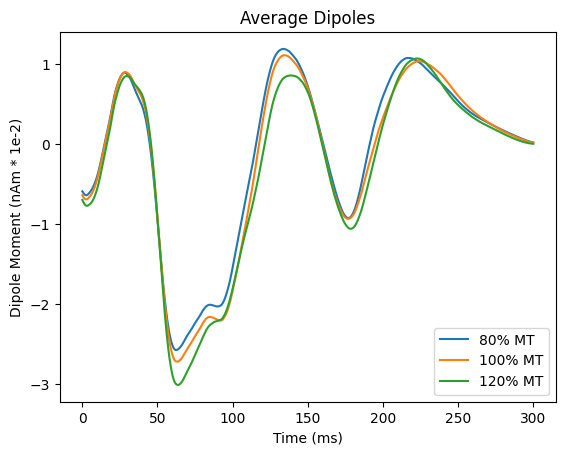

In [8]:
# from hnn_core import average_dipoles
# print(dpls_list)
avg_dipoles = [dpls[3] for dpls in dpls_list]

for dpl in avg_dipoles:
    plt.plot(dpl.times, dpl.data["agg"]*1e2)
plt.title("Average Dipoles")
plt.legend(["80% MT", "100% MT", "120% MT"])
plt.xlabel("Time (ms)")
plt.ylabel("Dipole Moment (nAm * 1e-2)")